# 勾配

In [41]:
%matplotlib inline

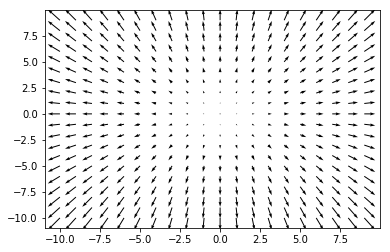

In [42]:
import matplotlib.pyplot as plt
import numpy as np

X = np.arange(-10, 10, 1)
Y = np.arange(-10, 10, 1)
U, V = np.meshgrid(X, Y)

fig, ax = plt.subplots()
q = ax.quiver(X, Y, U, V)
ax.quiverkey(q, X=0.3, Y=1.1, U=10,
             label='Quiver key, length = 10', labelpos='E')

plt.show()


In [44]:
import numpy as np
import matplotlib.pylab as plt
plt.switch_backend('agg')
from mpl_toolkits.mplot3d import Axes3D

In [45]:
def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)

        x[idx] = tmp_val - h
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)

        x[idx] = tmp_val # 値を元に戻す

    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)

        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)

        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

In [46]:
x0 = np.arange(-2, 2.5, 0.25)
x1 = np.arange(-2, 2.5, 0.25)
X, Y = np.meshgrid(x0, x1)

X = X.flatten()
Y = Y.flatten()

grad = numerical_gradient(function_2, np.array([X, Y]) )

No handles with labels found to put in legend.


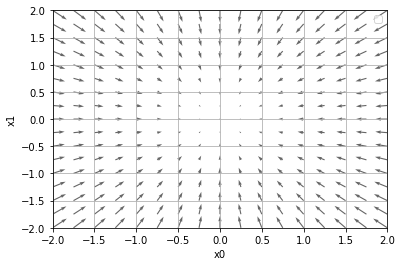

In [47]:
plt.figure()
plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()
plt.legend()
plt.draw()
plt.show()

# gradient_2d

In [48]:
def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 値を元に戻す
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

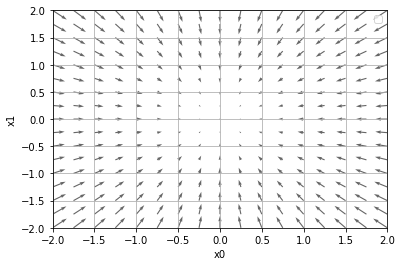

In [49]:
if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()
    
    grad = numerical_gradient(function_2, np.array([X, Y]) )
    
    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.legend([])
    plt.draw()
    plt.show()

# gradient_method

In [50]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_2(x):
    return x[0]**2 + x[1]**2


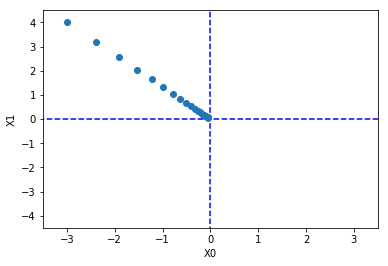

In [51]:
init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

# 活性化関数

## 恒等関数

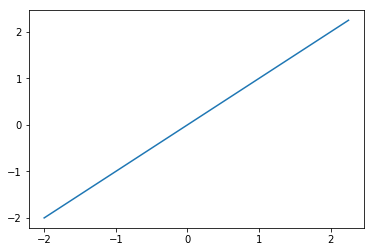

In [56]:
def identity_function(x):
    return x

x = np.arange(-2, 2.5, 0.25)
y = identity_function(x)

plt.plot(x, y)
plt.show()

## ステップ関数

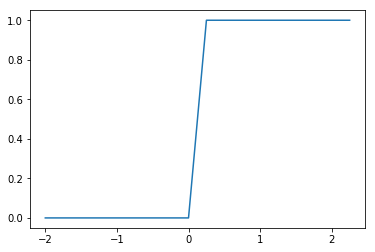

In [57]:
def step_function(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-2, 2.5, 0.25)
y = step_function(x)

plt.plot(x, y)
plt.show()

## シグモイド関数

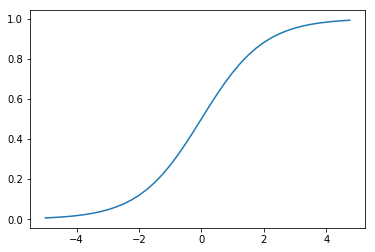

In [61]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))    

x = np.arange(-5, 5, 0.25)
y = sigmoid(x)

plt.plot(x, y)
plt.show()

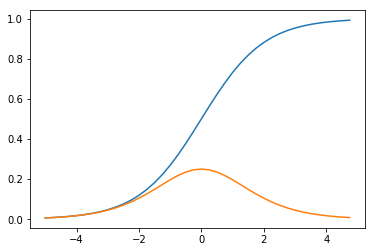

In [62]:
#傾き
def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)

x = np.arange(-5, 5, 0.25)
x_grad = sigmoid_grad(x)
y = sigmoid(x)

plt.plot(x, y)
plt.plot(x, x_grad)
plt.show()

## Relu関数

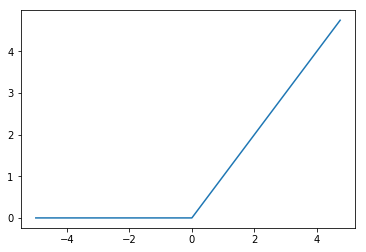

In [63]:
def relu(x):
    return np.maximum(0, x)

x = np.arange(-5, 5, 0.25)
y = relu(x)

plt.plot(x, y)
plt.show()

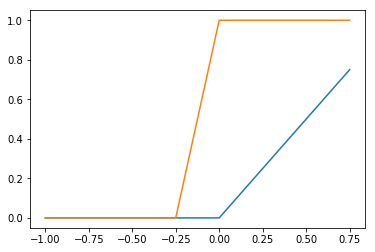

In [88]:
#傾き
def relu_grad(x):
    grad = np.zeros(x.shape, dtype=np.float64)    
    grad[x>=0] = 1
    return grad

x = np.arange(-1, 1, 0.25)
x_grad = relu_grad(x)
y = relu(x)

plt.plot(x, y)
plt.plot(x, x_grad)
plt.show()

## softmax関数

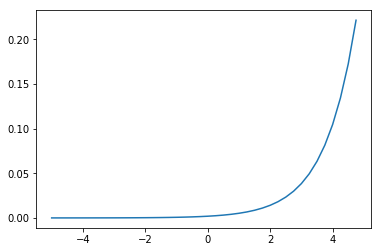

In [92]:
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # オーバーフロー対策
    return np.exp(x) / np.sum(np.exp(x))

x = np.arange(-5, 5, 0.25)
y = softmax(x)

plt.plot(x, y)
plt.show()

## ２乗誤差関数

In [96]:
def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

x = np.arange(-5, 5, 0.25)
t = np.arange(-5, 5, 0.25)
y = mean_squared_error(x, t)

print(y)

0.0


In [105]:
def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

x = np.arange(-5, 5, 0.25)
t = np.arange(-4, 6, 0.25)
y = mean_squared_error(x, t)
print(y)

20.0


## 交差エントロピー誤差関数

In [106]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 教師データがone-hot-vectorの場合、正解ラベルのインデックスに変換
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

x = np.arange(-5, 5, 0.25)
t = np.arange(-4, 6, 0.25)
y = cross_entropy_error(x, t)
print(y)

-1.5581446390991813
